SECTION A

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df = pd.read_csv('exam_dataset.csv')

In [3]:
#A1
display(df.shape)

(1470, 24)

In [4]:
#A2
display(df.ndim)

2

In [5]:
#A3
age_avg = np.average(df['Age'])
mincome_avg = np.average(df['MonthlyIncome'])
yearsco_avg = np.average(df['YearsAtCompany'])
print("Average age:", round(age_avg,2))
print("Average monthly income:", round(mincome_avg,2))
print("Average years at company:", round(yearsco_avg,2))

Average age: 36.92
Average monthly income: 6502.93
Average years at company: 7.01


In [6]:
#A4
min_mincome = min(df['MonthlyIncome'])
print("min monthly income:", min_mincome)
max_mincome = max(df['MonthlyIncome'])
print("max monthly income:", max_mincome)

min monthly income: 1009
max monthly income: 19999


<function matplotlib.pyplot.show(close=None, block=None)>

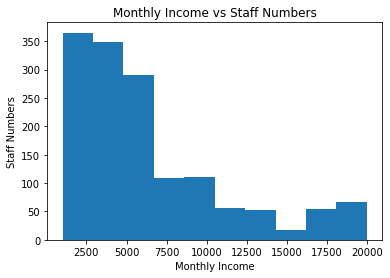

In [8]:
#A5
plt.hist(df['MonthlyIncome'])
plt.xlabel('Monthly Income')
plt.ylabel('Staff Numbers')
plt.title('Monthly Income vs Staff Numbers')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

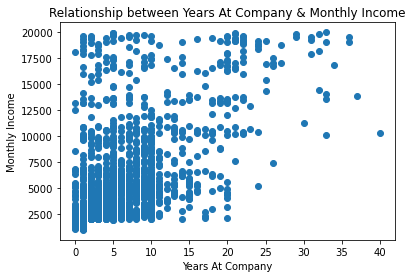

In [9]:
#A6
plt.scatter(df['YearsAtCompany'], df['MonthlyIncome'])
plt.xlabel('Years At Company')
plt.ylabel('Monthly Income')
plt.title('Relationship between Years At Company & Monthly Income')
plt.show

In [13]:
#A7
corr = np.corrcoef(df['YearsAtCompany'], df['MonthlyIncome'])
print("The correlation is:", round(corr[0,1],2))

The correlation is: 0.51


In [15]:
#range
19999-1009

18990

In [17]:
df['MonthlyIncome'].value_counts()

2342     4
5562     3
2741     3
2451     3
2610     3
        ..
5381     1
13577    1
12965    1
3339     1
14336    1
Name: MonthlyIncome, Length: 1349, dtype: int64

A8
a) The range of monthly income at Company A is 18990
b) The most frequent monthly income value based on the data falls for income less than 2500 while the least frequent falls for income between 14000 to 16000
c) The distribution is showing a right-skewed distribution which shows that majority of the employee have income less than 6000.
d) The scatter plot of Relationship between Years At Company & Monthly Income doesnt show a significant linear relationship. While the correlation is 0.51 show positive correlation, it is shows that monthly income does increase the longer you are at the company but there are other factors that influence value of income. 

SECTION B

In [49]:
#B1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#B2
df_b = pd.read_csv('exam_dataset.csv')

In [51]:
display(df_b.shape)
display(df_b.columns)

(1470, 24)

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'PerformanceRating',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [52]:
#B3
x = df_b.iloc[:, [0,1,2,3]].values
y = df_b.iloc[:, -1].values
print(x,y)

[[41 'Travel_Rarely' 5993 4]
 [49 'Travel_Frequently' 5130 2]
 [37 'Travel_Rarely' 2090 3]
 ...
 [27 'Travel_Rarely' 6142 2]
 [49 'Travel_Frequently' 5390 2]
 [34 'Travel_Rarely' 4404 3]] ['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


In [53]:
#B3
a = list(set(df.iloc[:,1].values))
a.sort()
print(a)

['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']


In [54]:
#B4
from sklearn.preprocessing import LabelEncoder
labelEncoderX = LabelEncoder()
x[:,1] = labelEncoderX.fit_transform(x[:,1])
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("BusinessTravel", OneHotEncoder(), [1])], remainder = 'passthrough')
x = ct.fit_transform(x)

In [55]:
#B5
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [56]:
#B6
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [57]:
#B7
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [58]:
y_pred=classifier.predict(x_test)

In [59]:
#B8
cm = confusion_matrix(y_test, y_pred)

total = 0
for i in range(2):
 for j in range(2):
     total = total + cm[i,j]
 accuracy = cm[0,0] + cm[1,1]
print('Accuracy score for Naive Beyes is : ', str(accuracy/total))

Accuracy score for Naive Beyes is :  0.7687074829931972


Based on accuracy score of 0.7687074829931972, the naive Bayes is quite a good model to predict the outcome of whether staff will have attrition based on attributes of age, business travel, monthly income and job satisfaction

SECTION C

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [62]:
df_c = pd.read_csv('clustering.csv')

In [63]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   A           400 non-null    float64
 2   B           400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [64]:
x=df_c.iloc[:,[1,2]].values

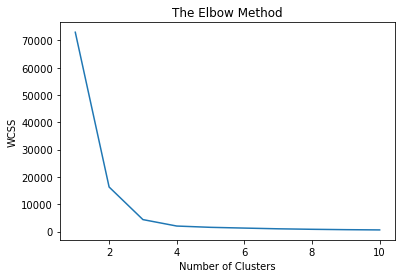

In [65]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([2, 0, 0, 2, 3, 3, 2, 0, 2, 0, 2, 1, 0, 1, 3, 2, 0, 2, 0, 1, 0, 3,
       1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 3, 1, 2, 2, 2, 3, 1, 1,
       1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 2, 3, 3, 2, 0, 3, 3, 2, 3, 1, 0, 0,
       2, 3, 3, 2, 3, 2, 2, 3, 2, 0, 2, 2, 3, 2, 1, 3, 0, 2, 1, 1, 0, 2,
       0, 3, 1, 0, 2, 1, 2, 2, 0, 3, 2, 0, 3, 0, 0, 2, 2, 3, 1, 2, 2, 3,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 3, 2, 2, 0, 2, 1, 2, 2, 1, 3, 0, 2,
       3, 2, 2, 3, 0, 2, 1, 0, 3, 1, 0, 1, 1, 3, 2, 2, 2, 1, 0, 0, 2, 2,
       1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 0, 2,
       2, 0, 1, 3, 0, 1, 2, 2, 2, 1, 1, 3, 1, 3, 2, 1, 1, 2, 0, 2, 1, 2,
       3, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 3, 3, 1, 3, 2,
       0, 3, 0, 0, 3, 1, 3, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 0, 0, 2, 3, 2,
       2, 0, 0, 3, 1, 3, 2, 2, 2, 3, 1, 0, 2, 2, 2, 3, 3, 3, 2, 3, 2, 0,
       3, 1, 3, 0, 1, 0, 0, 0, 3, 1, 2, 2, 2, 0, 3, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 1, 3, 1, 0, 2, 1, 3, 3, 2, 1,

<function matplotlib.pyplot.show(close=None, block=None)>

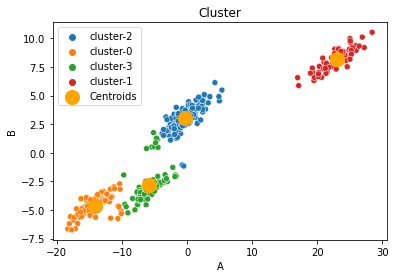

In [86]:
sns.scatterplot(x[:,0],x[:,1], hue=['cluster-{}'.format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,c='orange',label='Centroids')
plt.title('Cluster')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.show

In [87]:
score=silhouette_score(x,kmeans.labels_,metric='euclidean')
print(score)

0.6947711485598579


From the scatter plot we can see that there are 4 main cluster clearly seperated. While cluster-0 and -3 can be closely related and could probably combine.
Silohouette score shows that our cluster got 0.69 and it means its quite dense and separated from each other.

Text(0, 0.5, 'Feature 1')

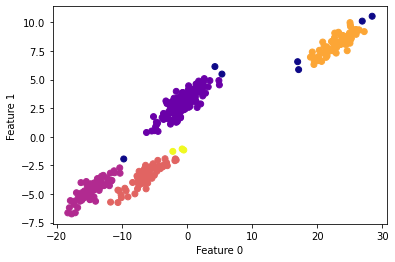

In [89]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

KMeans is a better clustering method compare to DBScan since it is more details.

DBscan is not a better clustering comapre to KMeans

Yes there is no clear distiction between two techniques